# Assignment 3 Submission for Adarsh Pal (180032)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as lin
import pandas as pd
import time

## Q1

### Q1 (a) Coding up the perceptron as given in the slides 

In [2]:
def Stochastic_SubGD(x,y,w0,totalprev,nt=1):
    # x,y,nt, w0 are the same as given in the slides
    # totalprev denotes the last totalprev number of changes in the values of w that we need for checking for convergence
    n=y.size
    w=w0
    queue=np.array([10]*totalprev)
    tol=1e-8
    t=0
    while(np.sum(queue)>tol):
        queue=np.delete(queue,0)
        num=np.random.randint(0,n)
        xn=np.array(x.iloc[num])
        yn=int(y.iloc[num])
        if(np.dot(w,xn)*yn<0):
            wnew=w+nt*yn*xn
            diff=np.sum(np.abs(wnew-w))
            queue=np.append(queue,diff)
            w=wnew
        else:
            queue=np.append(queue,0)
        t+=1
    return w

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt',index_col=False,names=['variance','skewness','curtosis','entropy','class'])

### Q1 (b) Preprocessing data and Creating the predictor function

In [31]:
# Shuffling the dataset, to remove any bias
# Note that there are no missing or anomalous values, hence, we do not require any explicit preprocessing for this
data=df.sample(frac=1)

In [32]:
x=data[['variance','skewness','curtosis','entropy']]
# Converting labels to -1,1 instead of 0,1
y=data['class']*2-1

In [33]:
y

518   -1
579   -1
81    -1
104   -1
894    1
      ..
597   -1
911    1
141   -1
347   -1
139   -1
Name: class, Length: 1372, dtype: int64

In [34]:
# n is the number of examples and d is the dimension of each example
n=len(x)
d=4
nt=1

In [35]:
# Predictor function
def predict(x,w):
    # returns -1 or 1 to denote the two classes
    ypred=np.dot(x,w)>=0
    return ypred*2-1

### Q1 (c) Training the algorithm on the dataset 

In [36]:
#Splitting the data into training and held out sets
msk = np.random.rand(n) < 0.8
xtrain = x[msk]
ytrain = y[msk]
xheldout = x[~msk]
yheldout = y[~msk]

In [37]:
print("Size of training set:",len(ytrain))
print("Size of held out set:",len(yheldout))

Size of training set: 1079
Size of held out set: 293


In [38]:
# Performing k-fold cross validation on the dataset and returning the fractional error in classification
def cross_validation(x,y,w0,kfold,totalprev):
    n=y.size
    rm=list()
    q=np.arange(n)
    np.random.shuffle(q)
    zz=np.array_split(q,kfold)
    for i in zz:
        b=np.zeros(n)
        b[i] = 1
        msk=np.array(b,dtype='bool')
        # Dividing into training and validation sets
        xval=x[msk]
        yval=y[msk]
        xtrain=x[~msk]
        ytrain=y[~msk]
        w=Stochastic_SubGD(xtrain,ytrain,w0,totalprev)
        ypred=predict(xval,w)
        error=np.sum(np.abs(ypred!=yval)/len(yval))
        rm.append(error)
    rm=np.array(rm)
    return np.mean(rm)

In [39]:
# Performing hyperparameter tuning, taking totalprev as the hyperparameter
def tuning(w0,parameters):
    l=list()
    timer=list()
    for i in parameters:
        start=time.time()
        l.append(cross_validation(xtrain,ytrain,w0,5,i))
        end=time.time()
        timer.append(end-start)
        print("Error for totalprev=",i,"is ",l[-1],"and time taken=",timer[-1])
    return (np.array(l),np.array(timer))

In [40]:
parameters=np.arange(10,101,5)
w0=np.random.normal(loc=0,scale=1,size=d)
(l,timer)=tuning(w0,parameters)

Error for totalprev= 10 is  0.10099052540913005 and time taken= 0.0424497127532959
Error for totalprev= 15 is  0.0750473729543497 and time taken= 0.06089472770690918
Error for totalprev= 20 is  0.12239018087855298 and time taken= 0.057237863540649414
Error for totalprev= 25 is  0.06950043066322135 and time taken= 0.09520363807678223
Error for totalprev= 30 is  0.048217054263565894 and time taken= 0.11412382125854492
Error for totalprev= 35 is  0.06029715762273902 and time taken= 0.15932226181030273
Error for totalprev= 40 is  0.05562015503875969 and time taken= 0.1801755428314209
Error for totalprev= 45 is  0.050981912144702844 and time taken= 0.3100900650024414
Error for totalprev= 50 is  0.057437553832902666 and time taken= 0.2850301265716553
Error for totalprev= 55 is  0.06022825150732127 and time taken= 0.3983626365661621
Error for totalprev= 60 is  0.0537510766580534 and time taken= 0.41178131103515625
Error for totalprev= 65 is  0.06489233419465978 and time taken= 0.4499087333679

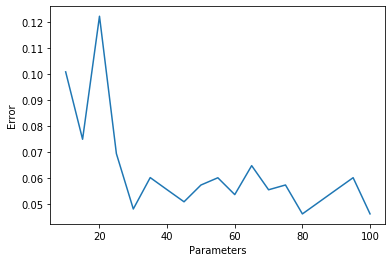

In [41]:
plt.plot(parameters,l)
plt.xlabel("Parameters")
plt.ylabel("Error")
plt.show()

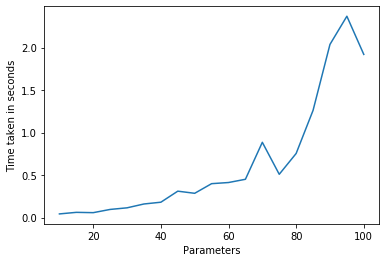

In [42]:
plt.plot(parameters,timer)
plt.xlabel("Parameters")
plt.ylabel("Time taken in seconds")
plt.show()

Thus, we see that as we increase the totalprev value, the error rate decrease. Also, after totalprev=80, the decrease in error rate is small. So, totalprev value of 80 could be optimal, keeping the fact in mind that as we increase the value of totalprev, the time taken for convergence is increasing.

### Q1 (d) Training the algorithm on the dataset and reporting the F1 Error

In [43]:
w=np.random.normal(1,0,d)
woptimal=Stochastic_SubGD(xtrain,ytrain,w,80)
yheldoutpred=predict(xheldout,woptimal)
error=np.sum(np.abs(yheldoutpred!=yheldout))
print("Test Accuracy:",1-error*1.0/len(yheldout))

Test Accuracy: 0.9215017064846416


In [44]:
# Calculating true positive, false positive, true negative, false negative respectively
tp=np.sum(np.logical_and(yheldoutpred==yheldout,yheldoutpred==1))
fp=np.sum(np.logical_and(yheldoutpred!=yheldout, yheldoutpred==1))
tn=np.sum(np.logical_and(yheldoutpred==yheldout, yheldoutpred==-1))
fn=np.sum(np.abs(yheldoutpred!=yheldout, yheldoutpred==-1))

In [45]:
# Calculating the precision and recall
precision=tp/(tp+fp)
recall=tp/(tp+fn)

In [46]:
#Calculting the F1 Score
f1=2*precision*recall/(precision+recall)
f1
print("F1 Score for held out set=",f1)

F1 Score for held out set= 0.8914728682170543


### Q2 (a) Finding the posterior probability distribution and plotting the pdfs of the prior, the likelihood and the posterior distributions

In [47]:
# mulikely and sigmalikely denote the mean and sd of the normal distribution from which y_i's are sampled
mulikely=10
sigmalikely=5
# samples= Number of samples of y taken
samples=50

# muprior and sigmaprior denote the mean and sd of the normal distribution used as the prior distribution
muprior=25
sigmaprior=5
#ysample=sampled y values
ysample=np.random.normal(loc=mulikely, scale=sigmalikely,size=samples)

In [48]:
# Calculates the pdf for input y in the normal distribution with mean=mean and sd=sd
def pdfnormal(y,mean,sd):
    return np.exp(-((y-mean)**2)/(2*sd*sd))/(np.sqrt(2*np.pi)*sd)

Suppose the samples $y_1,y_2,...,y_n \sim \mathcal{N}(\mu,\sigma^2)$ where $\mu$ is unknown and the prior distribution for $\mu=\mathcal{N}(\mu _p,\sigma_p^2)$ <br>
So, for $i=1,2,...,n,$<br>
$p(y_i | \mu) \propto \exp{\left(-\frac{(y_i-\mu)^2}{2\sigma ^2}\right)}$ and $p_{prior}(\mu) \propto \exp{\left(-\frac{(\mu-\mu_p)^2}{2\sigma_p ^2}\right)}$. <br>
Now, $y_1,y_2,...,y_n$ are iid samples drawn from $\mathcal{N}(\mu,\sigma^2)$ and so, the likelihood is derived from the data as follows:
\begin{align*}
p(y_1,y_2,....,y_n | \mu) &
\propto \prod_{i=1}^{n} p(y_i | \mu) \\&
\propto \prod_{i=1}^{n} \exp{\left[-\frac{(y_i-\mu)^2}{2\sigma ^2}\right]} \\&
\propto \exp{\left[\sum_{i=1}^{n}-\frac{(y_i-\mu)^2}{2\sigma ^2}\right]}
\end{align*}
Hence, the posterior distribution
\begin{align*}
p_{post}(\mu | y_1,y_2,...,y_n) &
=p_{prior}(\mu)  p(y_1,y_2,...,y_n|\mu) \\ &
\propto \exp{\left[-\frac{(\mu-\mu_p)^2}{2\sigma_p ^2}\right]}\exp{\left[\sum_{i=1}^{n}-\frac{(y_i-\mu)^2}{2\sigma ^2}\right]} \\&
\propto \exp{\left[-\frac{(\mu-\mu_p)^2}{2\sigma_p ^2}+{\sum_{i=1}^{n}(-\frac{(y_i-\mu)^2}{2\sigma ^2})}\right]} \\&
\propto \exp{\left[-\left(\frac{(\mu-\mu_p)^2}{2\sigma_p ^2}+\frac{\sum_{i=1}^{n}(y_i-\mu)^2}{2\sigma ^2}\right)\right]} \\&
\propto \exp{\left[-\left(\frac{\mu^2+\mu_p^2-2\mu\mu_p}{2\sigma_p ^2}+\frac{\sum_{i=1}^{n}(y_i^2+\mu^2-2\mu y_i)}{2\sigma ^2}\right)\right]} \\&
\propto \exp{\left[-\left(\frac{\sigma^2(\mu^2+\mu_p^2-2\mu\mu_p)+\sigma_p ^2 \sum_{i=1}^{n}(y_i^2+\mu^2-2\mu y_i)}{2\sigma ^2\sigma_p ^2}\right)\right]} \\&
\propto \exp{\left[-\left(\frac{\mu^2(\sigma^2+n\sigma_p^2)-2\mu(\mu_p \sigma^2+\sigma_p^2\sum_{i=1}^{n}y_i)+\sigma^2\mu_p^2+\sigma_p ^2 \sum_{i=1}^{n}y_i^2}{2\sigma ^2\sigma_p ^2}\right)\right]} \\&
\propto \exp{\left[-\left(\frac{\mu^2-2\mu\frac{(\mu_p \sigma^2+\sigma_p^2\sum_{i=1}^{n}y_i)}{(\sigma^2+n\sigma_p^2)}+\frac{(\sigma^2\mu_p^2+\sigma_p ^2 \sum_{i=1}^{n}y_i^2)}{(\sigma^2+n\sigma_p^2)}}{\frac{2\sigma ^2\sigma_p ^2}{(\sigma^2+n\sigma_p^2)}}\right)\right]} \\&
\propto \exp{\left[-\left(\frac{\left(\mu-\frac{(\mu_p \sigma^2+\sigma_p^2\sum_{i=1}^{n}y_i)}{(\sigma^2+n\sigma_p^2)}\right)^2}{\frac{2\sigma ^2\sigma_p ^2}{(\sigma^2+n\sigma_p^2)}}\right)\right]} \\&
\end{align*}
Thus, the posterior distribution is another Normal distribution with mean
\begin{equation*}
\mu_{post}=\frac{(\mu_p \sigma^2+\sigma_p^2\sum_{i=1}^{n}y_i)}{(\sigma^2+n\sigma_p^2)}
\end{equation*}
and
\begin{equation*}
variance=\sigma_{post}^2=\frac{\sigma ^2\sigma_p ^2}{(\sigma^2+n\sigma_p^2)}
\end{equation*}
Therefore, <br>
$p_{post}(\mu | y_1,y_2,...,y_n) = \mathcal{N}(\mu_{post},\sigma_{post}^2) \$

In [49]:
# mupost and sigmapost denote the mean and sd of the normal distribution coming out as the posterior distribution
mupost=(muprior*(sigmalikely**2)+(sigmaprior**2)*np.sum(ysample))/((sigmalikely**2)+samples*(sigmaprior**2))
varpost=(sigmalikely**2)*(sigmaprior**2)/((sigmalikely**2)+samples*(sigmaprior**2))
sigmapost=np.sqrt(varpost)

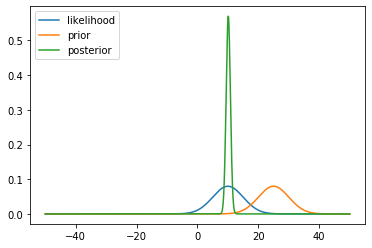

In [50]:
# Plotting the Likelihood, prior and posterior distribution
xdata = np.linspace(-50,50,10000)
plt.plot(xdata,pdfnormal(xdata,mulikely,sigmalikely))
plt.plot(xdata,pdfnormal(xdata,muprior,sigmaprior))
plt.plot(xdata,pdfnormal(xdata,mupost,sigmapost))
plt.legend(["likelihood", "prior","posterior"], loc ="upper left")
plt.show()

### Q2 (b) Implement the Metropolis Hastings algorithm

In [51]:
def pdfpost(y,mu,sd):
    return np.exp(-((mu-muprior)**2)/(2*sd*sd))*(np.exp(-np.sum((y-mu)**2)/(2*sd*sd)))

In [52]:
# Implementing the Metropolis Hastings Algorithm
def mh(ysample,numsamples,mu0,width):
    accepted=0
    mu=mu0
    mhsample=list()
    mhsample.append(mu)
    for _ in range(1,numsamples):
        proposal=np.random.normal(mu,width)
        numerator=pdfnormal(proposal,muprior,sigmaprior)*pdfpost(ysample,proposal,sigmalikely)
        denominator=pdfnormal(mu,muprior,sigmaprior)*pdfpost(ysample,mu,sigmalikely)
        r=numerator/denominator;
        u=np.random.uniform()
        if(r>u):
            mu=proposal
            accepted+=1
        mhsample.append(mu)
    return (np.array(mhsample),accepted)

In [53]:
# Samples obtained by the Metropolis Hastings Algorithm using proposal width=10
(mhsample,_)=mh(ysample,10000,0,10)
# Samples obtained from the Posterior Algorithm
postsample=np.random.normal(mupost,sigmapost,10000)

#### Plotting the histogram of samples obtained from the MH Algorithm alongside the analytic posterior distribution

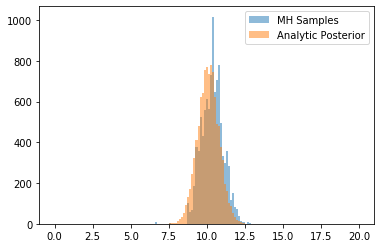

In [54]:
bins = np.linspace(0, 20, 150)
plt.hist(mhsample, bins, alpha=0.5, label='MH Samples')
plt.hist(postsample, bins, alpha=0.5, label='Analytic Posterior')
plt.legend(loc='upper right')
plt.show()

The distributions look very similar.
Thus we see that the samples obtained by the MH Algorithm converge to the analytic posterior distribution

## Q2 (c) Obtaining the speed of convergence of the sampling 
This is how we will conclude whether the distribution obtained has converged or not: We will repeatedly extract sampsize samples using MH Algorithm. Then, we will look at the difference in means of consecutive samples. If the consecutive means do not change by much, we will conclude that the distribution obtained has converged.

In [55]:
def converge(ysample,sampsize,mu0,proposalsd):
    maxiter=1000
    (cursamp,_)=mh(ysample,sampsize,mu0,proposalsd)
    tol=1e-2
    for i in range(maxiter):
        prevsamp=cursamp
        (cursamp,accepted)=mh(ysample,sampsize,mu0,proposalsd)
        if(np.abs(np.mean(cursamp)-np.mean(prevsamp))<tol):
            break
    # Returning the samples obtained from MH algorithm, the number of iterations taken and number of accepted values.
    return (cursamp,i,accepted)

In [62]:
# Function to compare the distributions obtained by the MH Algorithm for widths = 5^i, i=-3,-2,...,6
def compare_widths():
    fig, axs = plt.subplots(5, 2,figsize=(20,40))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    widths=5.0**np.arange(-3,7)
    i=0
    totsamp=5000
    for j in range(5):
        for k in range(2):
            (mhsample,tot,accepted)=converge(ysample,totsamp,np.mean(ysample),widths[i])
            postsample=np.random.normal(mupost,sigmapost,len(mhsample))
            bins = np.linspace(0, 20, 150)
            #meanerror represents how far the mean obtained is from the actual mean of the posterior distribution
            meanerror=np.abs(np.mean(mhsample)-mupost)
            #sderror represents how far the sd obtained is from the actual sd of the posterior distribution
            sderror=np.abs(np.sqrt(np.var(mhsample))-sigmapost)
            axs[j,k].text(0.6,0.5,'Fraction accepted='+str(accepted/totsamp)+'\n'+"Error in mean="+str(meanerror)+"\nError in sd="+str(sderror)+"\nIterations taken="+str(tot),transform = axs[j,k].transAxes)
            axs[j,k].set_title('width='+str(widths[i]))
            axs[j,k].hist(mhsample, bins, alpha=0.5, label='MH Samples')
            axs[j,k].hist(postsample, bins, alpha=0.5, label='Analytic Posterior')
            axs[j,k].legend(loc='upper right')
            i+=1
    plt.show()

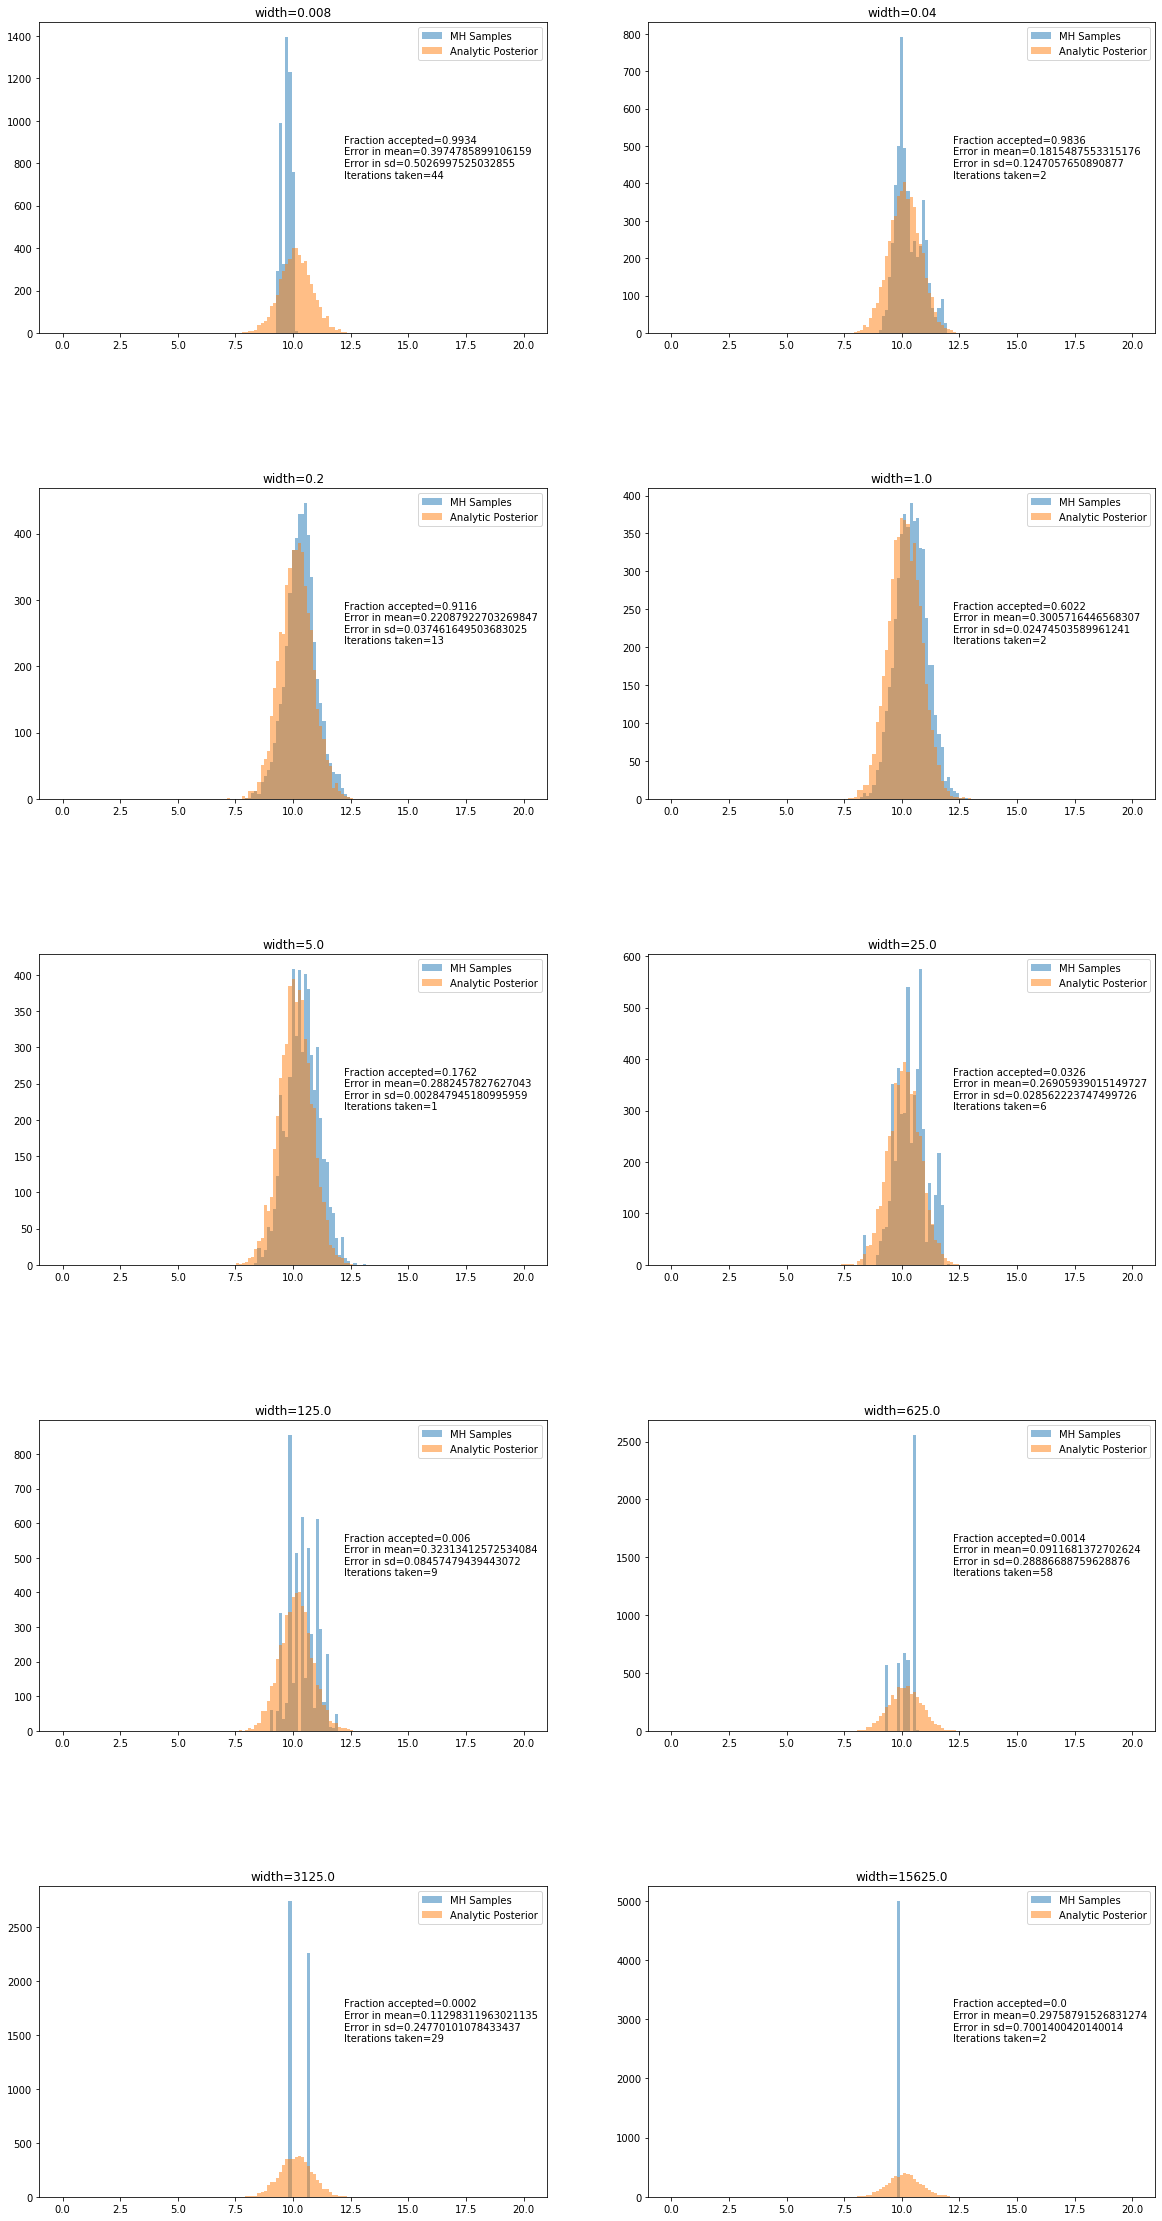

In [63]:
compare_widths()

From the above subplots, we can infer the following
* If width is too small, then we will make tiny moves implying we may accept a lot of them, but the samples obtained will be quite dependent.
* If width is too large, then we will propose values potentially too far away, which in principle would be good, but this means a lot of the values will be rejected. That means we will stay where we are quite often, increasing the correlation in the sample. In this case, the sampling may terminate too soon as well, since the values are rarely changing.

We assume that the optimal width would be that which does not reject a large number of samples, does not take a large number of iterations to converge and the difference between the mean and sd of the sample and that of the analytic posterior distribution is low.
Using this assumption, we observe that a width of 0.2, 1 or 5 would be optimal.